# Problem Statement
- Pridicting the cancer diagonisis is benign or malignant based on several observation on breast cancer deseiase



## Dataset Information
### Additional Information

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nucler present in the image.

- Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

- The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Has Missing Values?

No

## Additional Variable Information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

#### Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

# IMporting Data 

In [91]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [92]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# # metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# # variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 


In [93]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [94]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [95]:
X.shape

(569, 30)

# Import Libraries

In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Importing Data Using slkearn 

In [97]:
from sklearn.datasets import load_breast_cancer

In [98]:
cancer = load_breast_cancer()

In [99]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [100]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [101]:
# describe
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [102]:
# binary 
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [103]:
print(cancer['target_names'])

['malignant' 'benign']


In [104]:
# all series 
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [105]:
# as data excepted as above X , y 
cancer['data'].shape

(569, 30)

In [106]:
df_cancer = pd.DataFrame(np.c_[cancer['data'] , cancer['target']] , columns=np.append(cancer['feature_names'] , ['target']))

In [107]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [108]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [109]:
# columns 
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

### changing the theme or color style 

In [110]:
plt.style.use('fivethirtyeight')

# Visualitation the data

### pairplot 
**conclusion** 
- zero in the case malignant
- one(1) is the case for benign

### Countplot 
**conclusion**
1. 1 is 357
2. 0 is 212



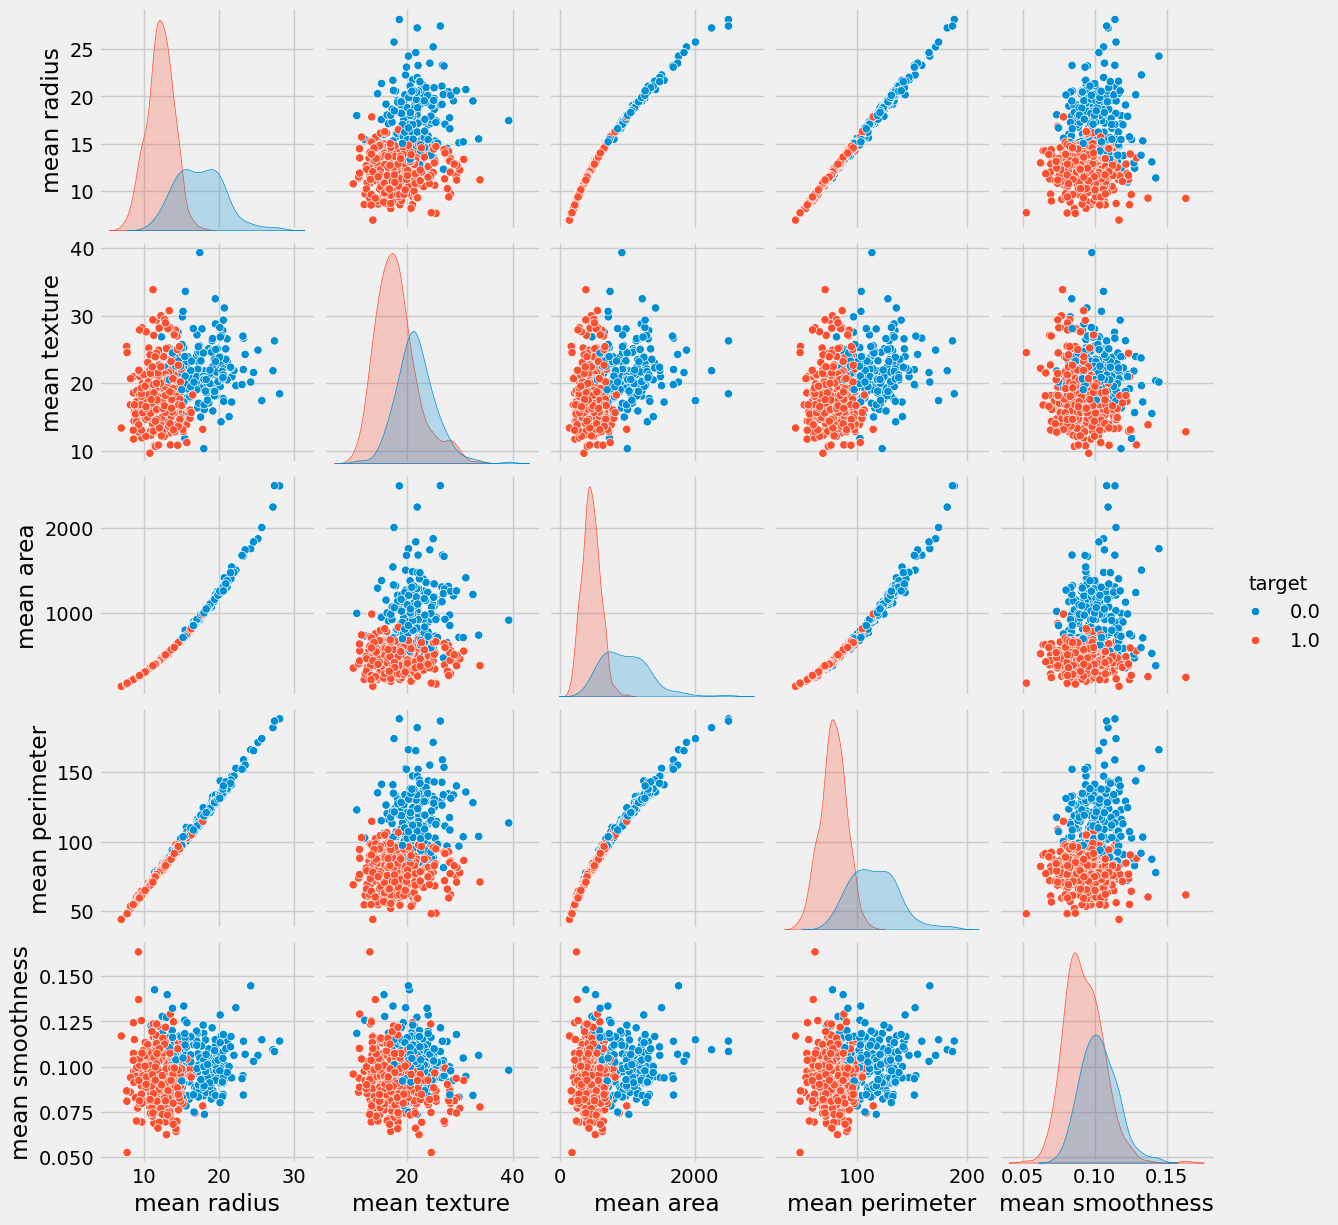

In [111]:
sns.pairplot(df_cancer  , hue = 'target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter','mean smoothness'])

<Axes: xlabel='target'>

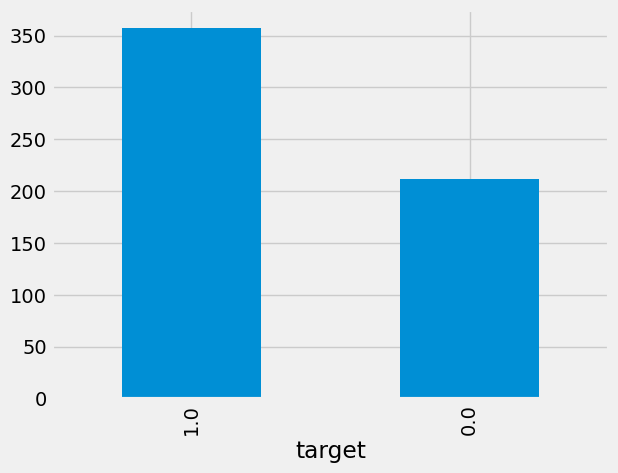

In [112]:
df_cancer['target'].value_counts().plot(kind = 'bar' )

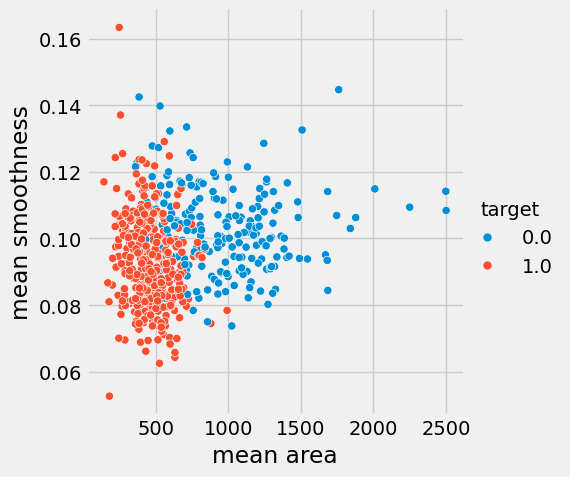

In [113]:
sns.relplot(x = 'mean area' , y = 'mean smoothness' , hue = 'target' , data = df_cancer , kind = 'scatter')

<Axes: >

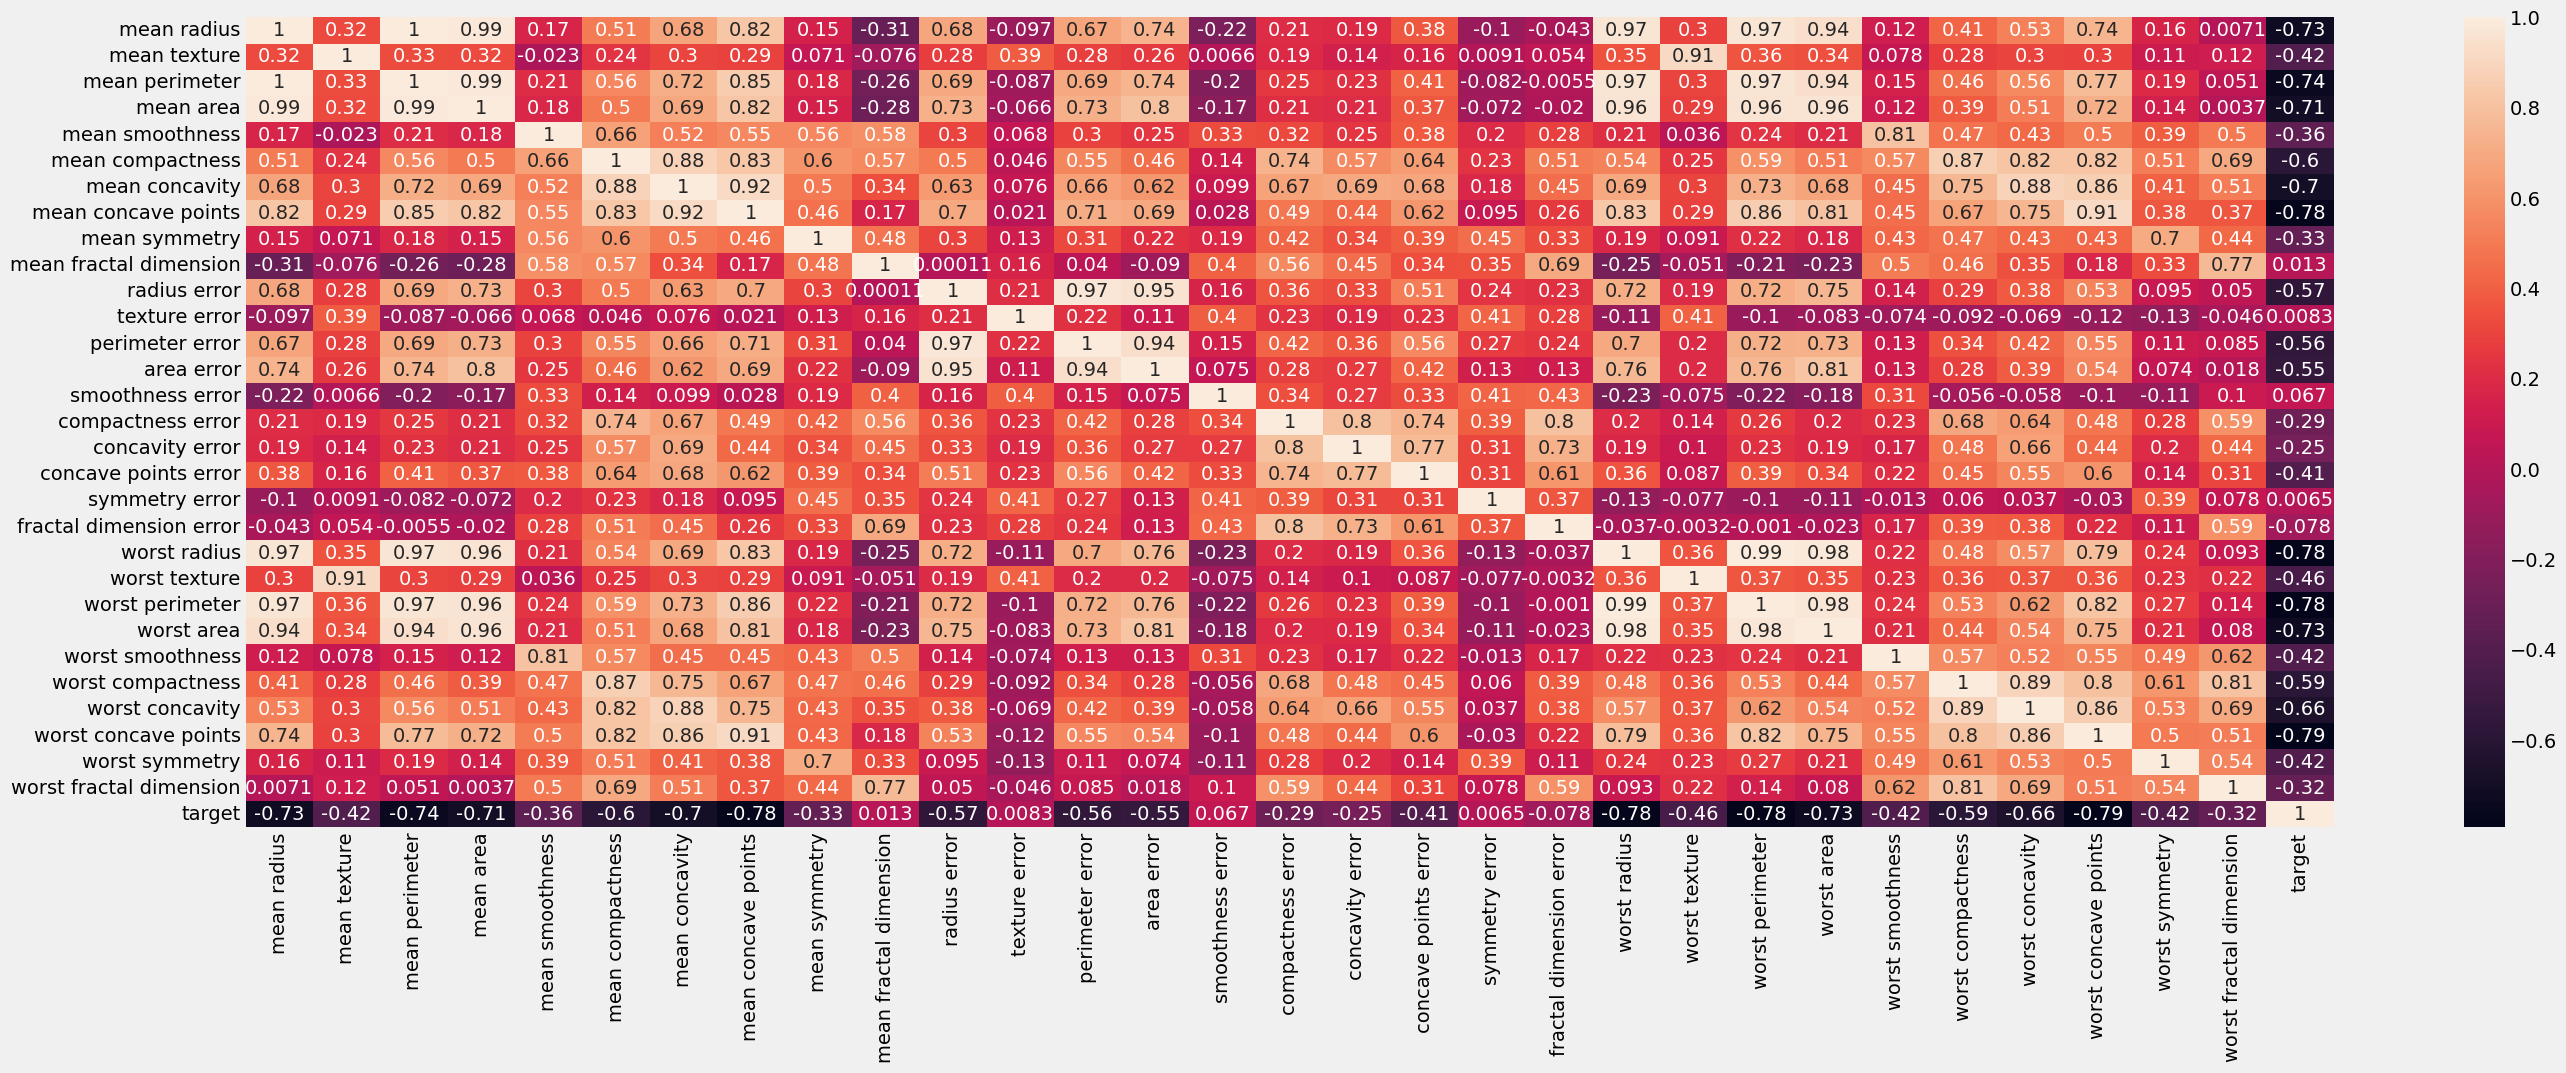

In [114]:
plt.figure(figsize=(30 , 10 ))
sns.heatmap(df_cancer.corr() , annot=True)

# Model Training 

In [115]:
X = df_cancer.drop(['target'] , axis = 1 )

In [118]:
y = df_cancer['target']

In [120]:
X.shape , y.shape

((569, 30), (569,))

## Split the data into training and testing data

In [121]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.23780,0.2671,0.10150,0.3014,0.08750
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.23360,0.2687,0.17890,0.2551,0.06589
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.23940,0.3791,0.15140,0.2837,0.08019
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.2403,0.07370,0.2556,0.09359
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.21180,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,16.51,32.29,107.40,826.4,0.1060,0.13760,0.1611,0.10950,0.2722,0.06956
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.13070,0.03716,0.1669,0.08116,...,11.26,24.39,73.07,390.2,0.1301,0.29500,0.3486,0.09910,0.2614,0.11620
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830


In [130]:
from sklearn.svm import SVC

In [131]:
from sklearn.metrics import classification_report , confusion_matrix

In [132]:
svc_model = SVC()

In [133]:
svc_model.fit(X_train , y_train)

SVC()

# Model Generalization

<img src="https://tse2.mm.bing.net/th/id/OIP.pnb7f28V2NKT3xTl61I0EAHaEF?r=0&rs=1&pid=ImgDetMain&o=7&rm=3" alt="Descriptive Alt Text" width="600" />


In [134]:
svc_model.fit(X_train , y_train)

SVC()

# Evaluation the Model 

In [135]:
y_pred = svc_model.predict(X_test)

In [136]:
y_pred

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [139]:
cm = confusion_matrix(y_test , y_pred)

<Axes: >

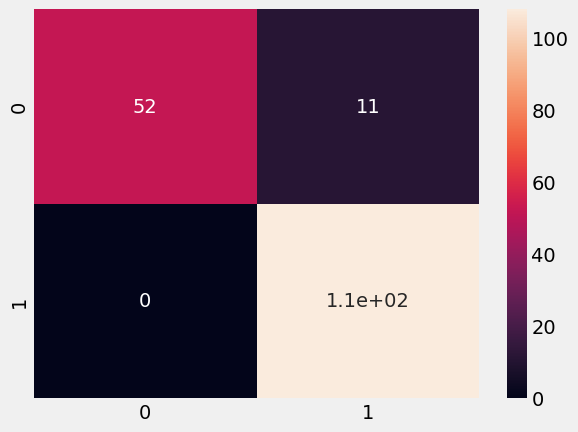

In [141]:
sns.heatmap(cm , annot=True)

# Use Case Using in this data to imropve the model 
1. Without data Normalization
2. data Normalization


$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Where:
- \( x \) is the original value
- \( x_{\text{min}} \) is the minimum value in the dataset
- \( x_{\text{max}} \) is the maximum value in the dataset


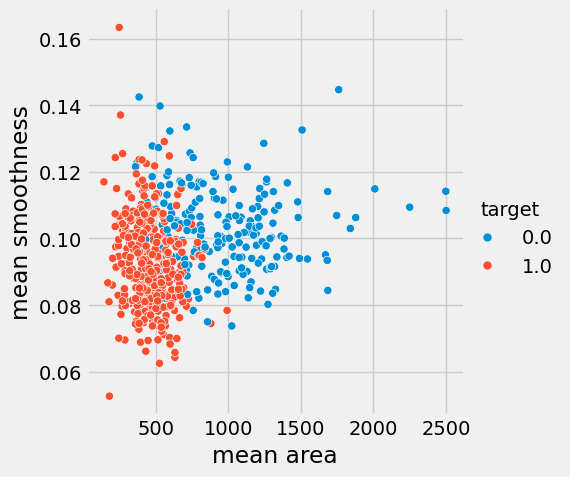

In [143]:
sns.relplot(x = 'mean area' , y = 'mean smoothness' , hue = 'target' , data = df_cancer , kind = 'scatter')

## SVM Paameters Optimization 

**C parameter**: Controls trade-off between classifying training points correctly and having a smooth decision boundary
- Small C (loose) makes cost (penalty) of misclassification low (soft margin)
- Large C (strict) makes cost of misclassification high (hard margin), forcing the model to explain
input data stricter and potentially over fit.

## IMPROVING THE MODEL by Normalize Scaling 

In [144]:
min_train = X_train.min()

In [145]:
range_train = (X_train - min_train).max()

In [146]:
X_train_scaled = (X_train - min_train)/range_train

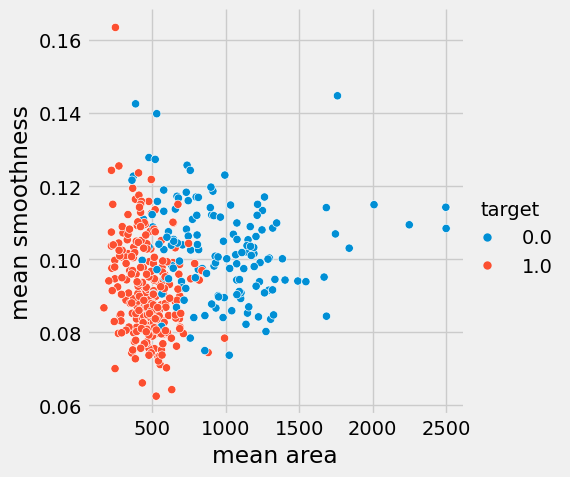

In [147]:
sns.relplot(x = X_train_['mean area'] , y = X_train['mean smoothness'] , hue = y_train)

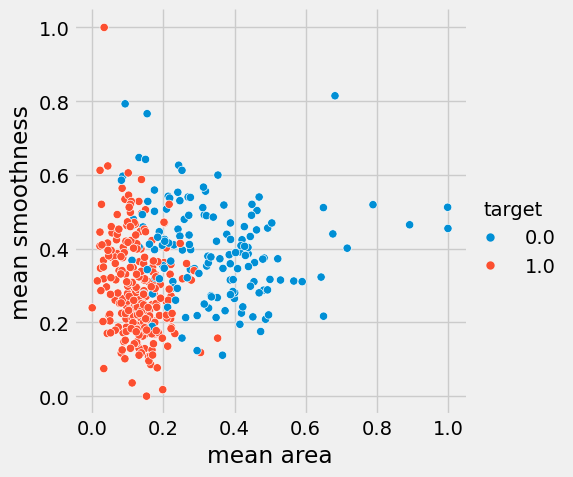

In [148]:
sns.relplot(x = X_train_scaled['mean area'] , y = X_train_scaled['mean smoothness'] , hue = y_train)

In [150]:
min_test = X_train.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/ range_test

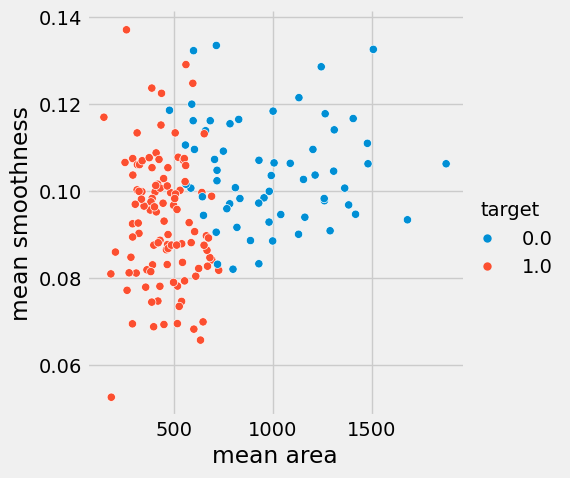

In [151]:
sns.relplot(x = X_test['mean area'] , y = X_test['mean smoothness'] , hue = y_test)

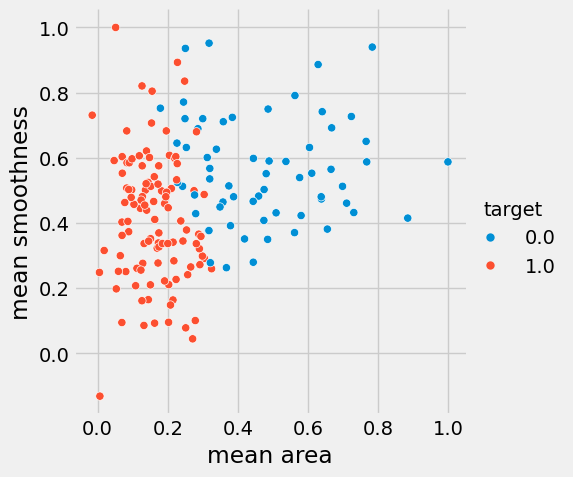

In [152]:
sns.relplot(x = X_test_scaled['mean area'] , y = X_test_scaled['mean smoothness'] , hue = y_test)

In [154]:
svc_model.fit(X_train_scaled , y_train)

SVC()

In [155]:
y_predict = svc_model.predict(X_test_scaled)

In [156]:
cm = confusion_matrix(y_test , y_predict)

<Axes: >

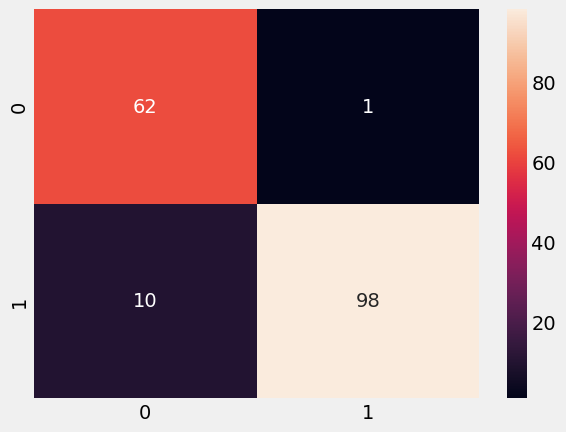

In [158]:
sns.heatmap(cm , annot=True)

In [159]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92        63
         1.0       0.99      0.91      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.93       171
weighted avg       0.94      0.94      0.94       171



- You're using **GridSearchCV** to perform hyperparameter tuning for an SVM model. Here's the flow:

**Model Setup**:
- You define a parameter grid for C, gamma, and kernel—these control regularization, decision boundary flexibility, and the type of kernel used.

**GridSearchCV**:
- Trains the model on every combination of parameters.
- Uses cross-validation (default is 5-fold) to evaluate each combo.

- Selects the best-performing set based on a scoring metric (default: accuracy).

**Final Model**: 
- grid.fit(X_train_scaled, y_train) trains the best model on the full training set.

## When and When or Why not 
- GridSearchCV is best used when you want to systematically explore combinations of hyperparameters to find the most effective configuration for a model. It’s especially valuable when working with algorithms like SVM, where parameters like `C`, `gamma`, and `kernel` significantly influence performance. By using cross-validation internally, GridSearchCV helps reduce overfitting and gives a more reliable estimate of how each parameter set performs across different data splits. This makes it ideal for medium-sized datasets where computational cost is manageable and model performance is sensitive to tuning.

- However, GridSearchCV may not be the best choice in every scenario. If you're working with very large datasets or models that are slow to train, the exhaustive nature of grid search can become prohibitively expensive. In such cases, alternatives like RandomizedSearchCV or Bayesian optimization offer more efficient exploration. Also, when the dataset is small or noisy, the cross-validation scores from GridSearchCV can be unstable, leading to misleading conclusions. Finally, if your model has many hyperparameters with wide ranges, the grid can grow exponentially, making it impractical without narrowing the search space first.

In [162]:
param_grid = {"C" : [0.1 , 1 , 10 , 100] , 'gamma' :[1 , 0.1 , 0.01 , 0.001] , 'kernel' : ['rbf']}

In [164]:
from sklearn.model_selection import GridSearchCV

In [168]:
grid = GridSearchCV(SVC() , param_grid , refit = True , verbose = 4 )

In [169]:
grid.fit(X_train_scaled , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.911 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [170]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [172]:
grid_predictions = grid.predict(X_test_scaled)

In [174]:
cm = confusion_matrix(y_test , grid_predictions)

<Axes: >

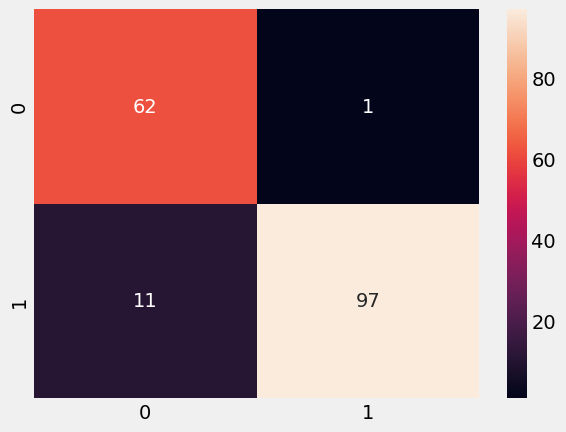

In [176]:
sns.heatmap(cm , annot = True)

In [177]:
# there is no more change in model after using the model 

In [178]:
print(classification_report(y_test , grid_predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91        63
         1.0       0.99      0.90      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.93      0.93       171



In [181]:
# print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92        63
         1.0       0.99      0.91      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.93       171
weighted avg       0.94      0.94      0.94       171



 # Conclusion
- Machine learning techniques (SVM) was able to classify tumors into Malignant/Benign with 94% accuracy.
- The technique can rapidly evaluate breast masses and classify them in an automated fashion.
- Early breast cancer can dramatically save lives especially in the developing world.
- The technique can be further improved by combining Computer vision/ML techniques to directly classify
cancer using tissue images.
